In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [11]:
import tensorflow as tf
import numpy as np

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# create graph: model
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# create graph: loss
loss = tf.reduce_mean(tf.square(y - y_data))

# bind optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# run graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [ 0.025] [ 0.482]
20 [ 0.06] [ 0.322]
40 [ 0.088] [ 0.307]
60 [ 0.096] [ 0.302]
80 [ 0.099] [ 0.301]
100 [ 0.1] [ 0.3]
120 [ 0.1] [ 0.3]
140 [ 0.1] [ 0.3]
160 [ 0.1] [ 0.3]
180 [ 0.1] [ 0.3]
200 [ 0.1] [ 0.3]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [17]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

In [30]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

In [18]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [34]:
model.compile("adam", "categorical_crossentropy")

In [20]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [22]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.5022     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.2494     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.2078     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.1814     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1623     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.1473     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.1342     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.1230     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.1132     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.1055     


In [23]:
# recreating the model seems the only way to reset?
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy")

In [24]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s - loss: 0.5383 - val_loss: 0.2434
Epoch 2/10
54000/54000 [==============================] - 1s - loss: 0.2714 - val_loss: 0.1961
Epoch 3/10
54000/54000 [==============================] - 1s - loss: 0.2253 - val_loss: 0.1698
Epoch 4/10
54000/54000 [==============================] - 1s - loss: 0.1958 - val_loss: 0.1528
Epoch 5/10
54000/54000 [==============================] - 1s - loss: 0.1734 - val_loss: 0.1400
Epoch 6/10
54000/54000 [==============================] - 1s - loss: 0.1559 - val_loss: 0.1349
Epoch 7/10
54000/54000 [==============================] - 1s - loss: 0.1427 - val_loss: 0.1275
Epoch 8/10
54000/54000 [==============================] - 1s - loss: 0.1310 - val_loss: 0.1281
Epoch 9/10
54000/54000 [==============================] - 1s - loss: 0.1218 - val_loss: 0.1186
Epoch 10/10
54000/54000 [==============================] - 1s - loss: 0.1134 - val_loss: 0.1198


In [38]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy")
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s - loss: 0.5127 - val_loss: 0.2372
Epoch 2/100
54000/54000 [==============================] - 1s - loss: 0.2633 - val_loss: 0.1971
Epoch 3/100
54000/54000 [==============================] - 1s - loss: 0.2246 - val_loss: 0.1787
Epoch 4/100
54000/54000 [==============================] - 1s - loss: 0.1984 - val_loss: 0.1617
Epoch 5/100
54000/54000 [==============================] - 1s - loss: 0.1795 - val_loss: 0.1537
Epoch 6/100
54000/54000 [==============================] - 1s - loss: 0.1624 - val_loss: 0.1439
Epoch 7/100
54000/54000 [==============================] - 1s - loss: 0.1469 - val_loss: 0.1300
Epoch 8/100
54000/54000 [==============================] - 1s - loss: 0.1344 - val_loss: 0.1249
Epoch 9/100
54000/54000 [==============================] - 1s - loss: 0.1234 - val_loss: 0.1175
Epoch 10/100
54000/54000 [==============================] - 1s - loss: 0.1148 - val_los

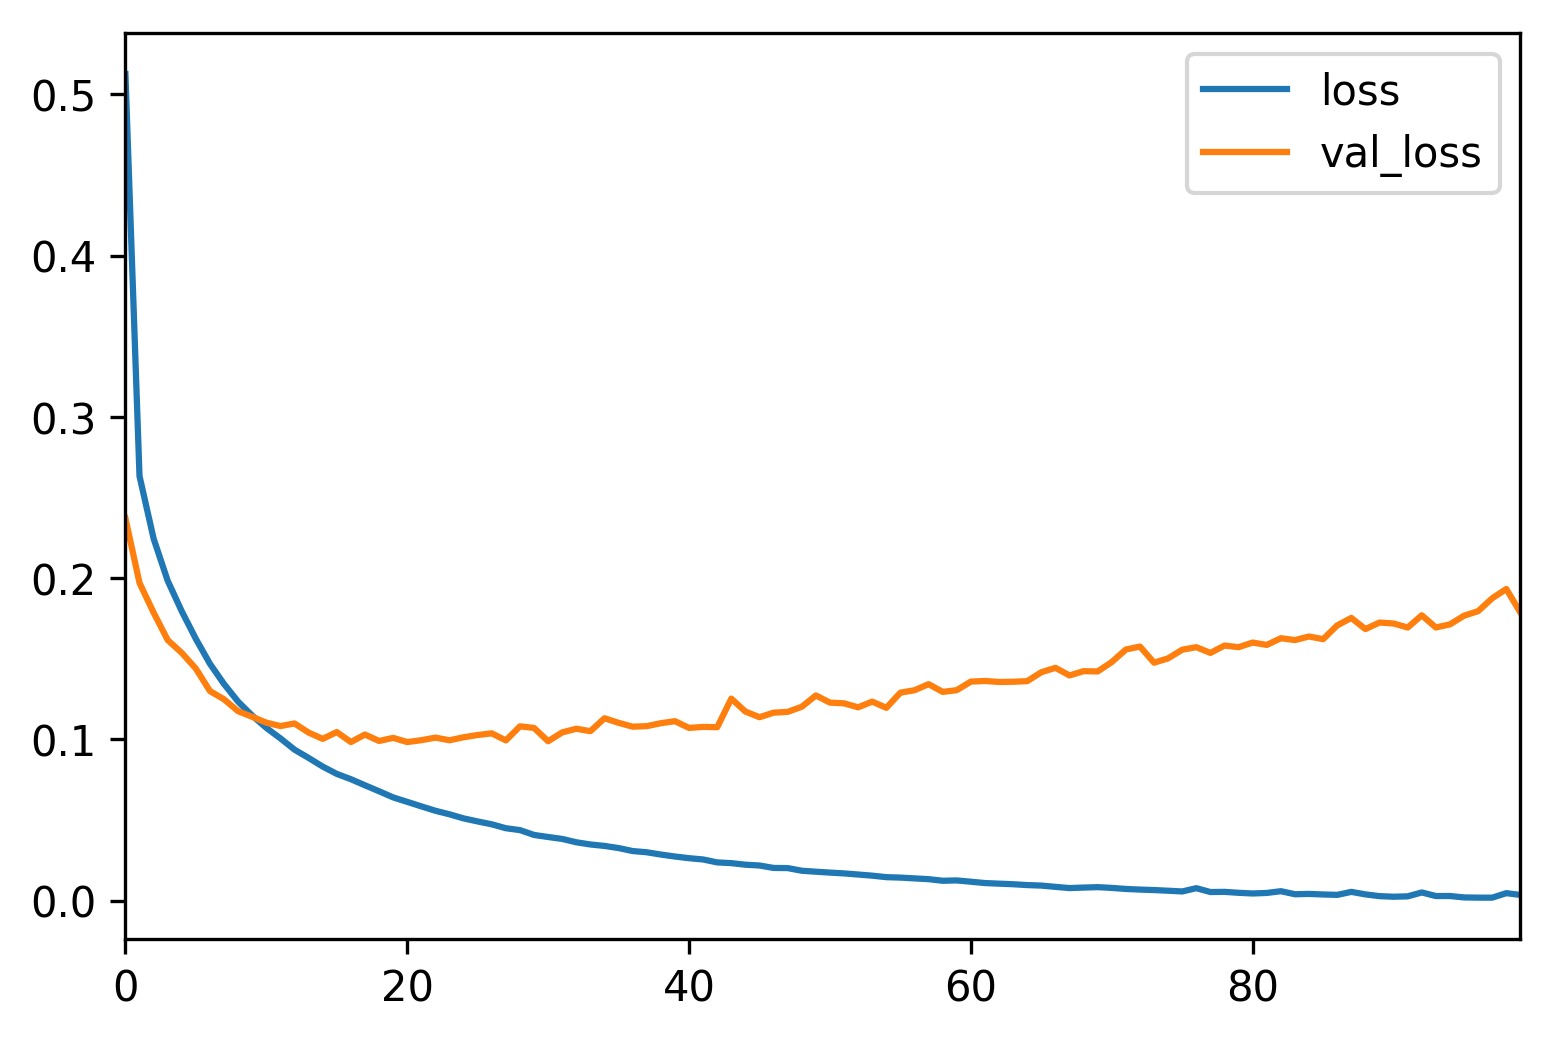

In [42]:
pd.DataFrame(history_callback.history).plot()

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=32):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,)),
        Activation('relu'),
        Dense(10),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10],  # epochs is fit parameter, not in make_model!
              'hidden_size': [32, 64, 256]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [29]:
grid.fit(X_train, y_train)

Epoch 1/1
48000/48000 [==============================] - 3s - loss: 0.3930 - acc: 0.8900     
Epoch 2/5
48000/48000 [==============================] - 2s - loss: 0.2084 - acc: 0.9402     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1641 - acc: 0.9524     
Epoch 4/5
48000/48000 [==============================] - 2s - loss: 0.1367 - acc: 0.9606     
Epoch 5/5
48000/48000 [==============================] - 4s - loss: 0.3337 - acc: 0.9059     
Epoch 2/5
48000/48000 [==============================] - 4s - loss: 0.1606 - acc: 0.9522     
Epoch 3/5
48000/48000 [==============================] - 3s - loss: 0.1179 - acc: 0.9648     
Epoch 4/5
48000/48000 [==============================] - 3s - loss: 0.0930 - acc: 0.9722     
Epoch 5/5
48000/48000 [==============================] - 8s - loss: 0.2480 - acc: 0.9289     
Epoch 2/5
48000/48000 [==============================] - 8s - loss: 0.1040 - acc: 0.9691     
Epoch 3/5
48000/48000 [==============================] - 8s 

GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f6ffea94160>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10], 'hidden_size': [32, 64, 256]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [33]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs", "param_hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_hidden_size                                   
1            32                        0.930017          0.935350
             64                        0.941433          0.948358
             256                       0.959117          0.966929
5            32                        0.956417          0.969746
             64                        0.967317          0.983113
             256                       0.973900          0.992196
10           32                        0.960100          0.979671
             64                        0.968617          0.992025
             256                       0.975050          0.996396

In [50]:

model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy")
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 13s - loss: 0.2302 - val_loss: 0.0980
Epoch 2/20
54000/54000 [==============================] - 12s - loss: 0.0841 - val_loss: 0.0829
Epoch 3/20
54000/54000 [==============================] - 12s - loss: 0.0505 - val_loss: 0.0720
Epoch 4/20
54000/54000 [==============================] - 12s - loss: 0.0368 - val_loss: 0.0717
Epoch 5/20
54000/54000 [==============================] - 12s - loss: 0.0275 - val_loss: 0.0851
Epoch 6/20
54000/54000 [==============================] - 13s - loss: 0.0226 - val_loss: 0.0813
Epoch 7/20
54000/54000 [==============================] - 12s - loss: 0.0188 - val_loss: 0.0730
Epoch 8/20
54000/54000 [==============================] - 12s - loss: 0.0187 - val_loss: 0.0917
Epoch 9/20
54000/54000 [==============================] - 11s - loss: 0.0121 - val_loss: 0.0805
Epoch 10/20
54000/54000 [==============================] - 11s - loss: 0.0118 - val_los

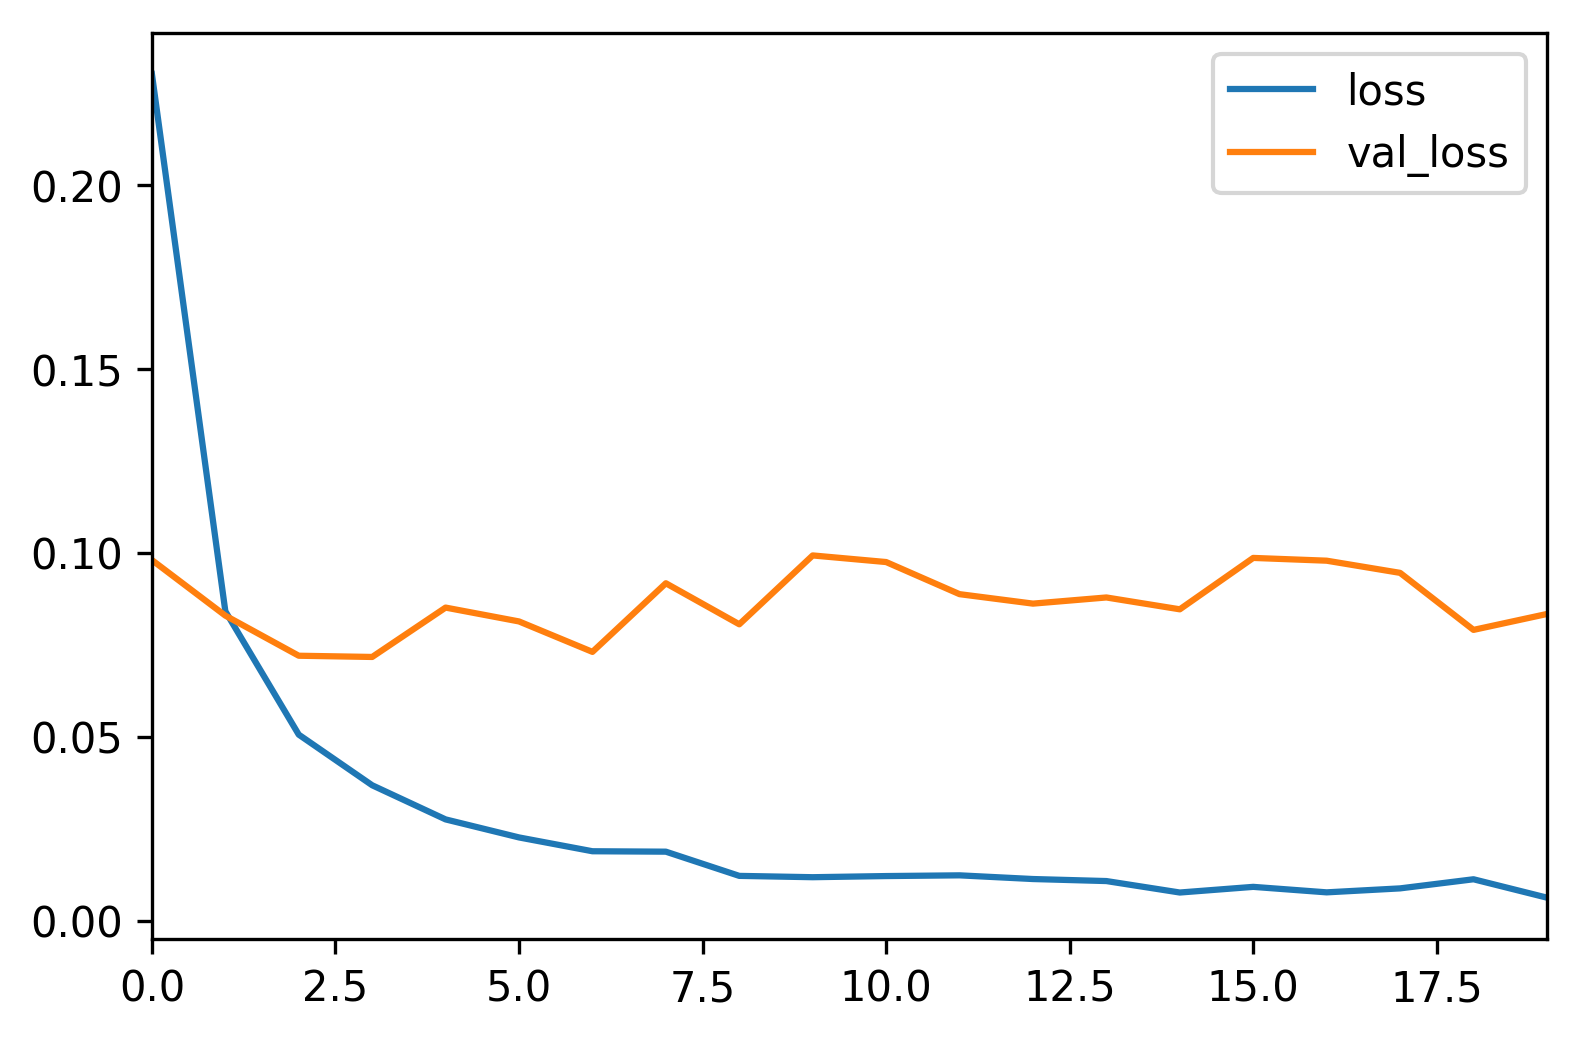

In [52]:
pd.DataFrame(history.history).plot()

In [ ]:
from keras.layers import Dropout

model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dropout(.2),
    Dense(512, activation='relu'),
    Dropout(.2),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy")
history_dropout = model.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 12s - loss: 0.2639 - val_loss: 0.0963
Epoch 2/20
54000/54000 [==============================] - 11s - loss: 0.1068 - val_loss: 0.0769
Epoch 3/20
54000/54000 [==============================] - 12s - loss: 0.0749 - val_loss: 0.0775
Epoch 4/20
54000/54000 [==============================] - 12s - loss: 0.0571 - val_loss: 0.0672
Epoch 5/20
54000/54000 [==============================] - 13s - loss: 0.0470 - val_loss: 0.0791
Epoch 6/20
42880/54000 [======================>.......] - ETA: 2s - loss: 0.0372